**Data Programming Project Project** <br> 

**House Prices - Advanced Regression Techniques**
<br> <br>
-Draft 1.0.1 <br>
Studentet: Alban Asllani, Pajtim Morina<br>



**Table of Contents**


1. Import Packages
2. Load Datasets
3. Read DataFrame
4. Exploratory data analysis 
5. Feature engineering
6. Hyperparameter tunning
7. Training/predict
8. Model validation

---
For use create with name : kaggle_houses_prices and add inside the data from 
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
---

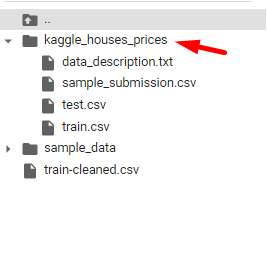

In [ ]:
#importing numpy and pandas, seaborn

import numpy as np #linear algebra
import pandas as pd #datapreprocessing, CSV file I/O
import seaborn as sns #for plotting graphs
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

In [ ]:
house_data_train = pd.read_csv("/content/kaggle_houses_prices/train.csv")
X_test_house_data_train = pd.read_csv("/content/kaggle_houses_prices/test.csv")

# house_data_train.info() 

In [ ]:
print("house_data_train shape", house_data_train.shape)
print("X_test_house_data_train shape", X_test_house_data_train.shape)

house_data_train shape (1460, 81)
X_test_house_data_train shape (1459, 80)


Get DataFrame head

Pandas head() method is used to return top n (5 by default) rows of a data frame or series.

In [ ]:
house_data_train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Exploratory data analysis

In [ ]:
house_data_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Calling sum() of the DataFrame returned by isnull() will give a series containing data about count of NaN in each column.

In [ ]:
nulls = pd.DataFrame(house_data_train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81


In [ ]:
print ("Unique values are:", house_data_train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


We can use the documentation to find out what these values indicate:

MiscFeature: Miscellaneous feature not covered in other categories

   Elev Elevator
   Gar2 2nd Garage (if not described in garage section)
   Othr Other
   Shed Shed (over 100 SF)
   TenC Tennis Court
   NA   None

In [ ]:
categoricals = house_data_train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [ ]:
print ("Original: \n")
print (house_data_train.Street.value_counts(), "\n")

Original: 

Pave    1454
Grvl       6
Name: Street, dtype: int64 



In the Street column, the unique values are Pave and Grvl, which describe the type of road access to the property. In the training set, only 5 homes have gravel access. Our model needs numerical data, so we will use one-hot encoding to transform the data into a Boolean column.

We create a new column called enc_street. The pd.get_dummies() method will handle this for us.

As mentioned earlier, we need to do this on both the train and test data.

Using a barplot, we can see how the category of the FirePlace increases the value of SalePrice.

It is also worth noting how much higher the value is when the house has an Excellent fireplace.

This means we should keep FireplaceQu as feature.

In [ ]:
house_data_train['enc_street'] = pd.get_dummies(house_data_train.Street, drop_first=True)
X_test_house_data_train['enc_street'] = pd.get_dummies(house_data_train.Street, drop_first=True)

In [ ]:
columns_with_miss = house_data_train.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
c = list(columns_with_miss.index)
c.append('SalePrice')
house_data_train[c].corr()

,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
LotFrontage,1.000000,0.193458,0.070250,0.351799
MasVnrArea,0.193458,1.000000,0.252691,0.477493
GarageYrBlt,0.070250,0.252691,1.000000,0.486362
SalePrice,0.351799,0.477493,0.486362,1.000000


Note that LotFrontage, MasVnrArea, and GarageYrBlt have a positive correlation with SalePrice, but this correlation isn’t very strong.

To simplify this analisys, we will remove theses columns for now:

In [ ]:
cols_to_be_removed = ['BsmtCond', 'BsmtQual', 'ExterCond','ExterQual','ExterQual','GarageCond']
# - BsmtCond
# - BsmtQual
# - ExterCond
# - ExterQual
# - GarageCond
house_data_train.drop(columns=cols_to_be_removed, inplace=True)

lets fill missing data 

In [ ]:
columns_with_miss = house_data_train.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
print(f'cols with missing values: {len(columns_with_miss)}')
columns_with_miss.sort_values(ascending=False)

cols with missing values: 16


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
MasVnrType         8
MasVnrArea         8
Electrical         1
dtype: int64

Clean Data remove the ID column

In [ ]:
house_data_train.drop(columns=['Id'], inplace=True)

Categorical variables
Let’s work on the categorical variables of our dataset.

Dealing with missing values
Filling Categorical NaN that we know how to fill due to the description file.

In [ ]:
# Fills NA in place of NaN
for filNA in ['GarageType', 'GarageFinish', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1']:
    house_data_train[filNA].fillna('NA', inplace=True)

# Fills None in place of NaN
house_data_train['MasVnrType'].fillna('None', inplace=True)

Lets check how many missing data we have left now.

In [ ]:
columns_with_miss = house_data_train.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
print(f'Columns with missing values: {len(columns_with_miss)}')
columns_with_miss.sort_values(ascending=False)

Columns with missing values: 10


PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
LotFrontage     259
GarageYrBlt      81
GarageQual       81
MasVnrArea        8
Electrical        1
dtype: int64

Lets check is to see how many columns have lots of data equals to 0.

In [ ]:
house_data_train.isin([0]).sum().sort_values(ascending=False).head(60)

PoolArea         1453
3SsnPorch        1436
LowQualFinSF     1434
MiscVal          1408
BsmtHalfBath     1378
ScreenPorch      1344
BsmtFinSF2       1293
EnclosedPorch    1252
HalfBath          913
MasVnrArea        861
BsmtFullBath      856
2ndFlrSF          829
WoodDeckSF        761
Fireplaces        690
OpenPorchSF       656
BsmtFinSF1        467
BsmtUnfSF         118
GarageArea         81
GarageCars         81
TotalBsmtSF        37
FullBath            9
enc_street          6
BedroomAbvGr        6
KitchenAbvGr        1
PavedDrive          0
SalePrice           0
SaleCondition       0
SaleType            0
YrSold              0
MoSold              0
GarageQual          0
MiscFeature         0
TotRmsAbvGrd        0
Functional          0
Fence               0
PoolQC              0
FireplaceQu         0
GarageType          0
GarageYrBlt         0
GarageFinish        0
KitchenQual         0
MSSubClass          0
GrLivArea           0
LotConfig           0
HouseStyle          0
BldgType  

In this case, even though there are many 0’s, they have meaning.

For instance, PoolArea (Pool area in square feet) equals 0 means that the house doesn’t have any pool area.

This is important information correlated to the house and thus, we are going to keep them.

Saving cleaned data
Let’s see how the cleaned data looks like and how many columns we have left.

We have no more missing values:

In [ ]:
columns_with_miss = house_data_train.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
print(f'Columns with missing values: {len(columns_with_miss)}')
columns_with_miss.sort_values(ascending=False)

Columns with missing values: 10


PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
LotFrontage     259
GarageYrBlt      81
GarageQual       81
MasVnrArea        8
Electrical        1
dtype: int64

In [ ]:
print(house_data_train.shape)
print(house_data_train.info())

(1460, 76)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 1

Now we can save cleand data and use it 

In [ ]:
# house_data_train.to_csv('train-cleaned.csv')

# Feature engineering

In [ ]:
#Get DataFrame no of rows and columns
# house_data_train_clean        = pd.read_csv("/content/train-cleaned.csv")
print("house_data_train shape", house_data_train.shape)
print("X_test_house_data_train shape", X_test_house_data_train.shape)



house_data_train shape (1460, 76)
X_test_house_data_train shape (1459, 81)


...


In [ ]:
house_df = pd.concat([house_data_train,X_test_house_data_train],ignore_index = True, sort = False)
tr_idx = house_df['SalePrice'].notnull()

Finding the count of no of bedrooms.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


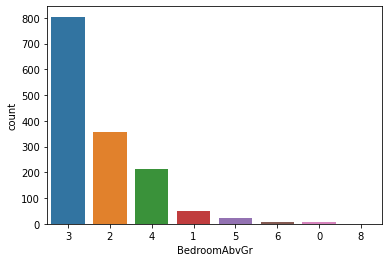

In [ ]:
sns.countplot(house_data_train.BedroomAbvGr,order=house_data_train['BedroomAbvGr'].value_counts().index)

Get House built year and show it in a graph

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


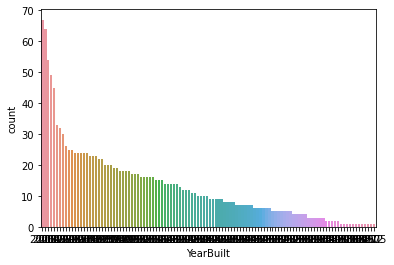

In [ ]:
house_data_train['YearBuilt'].value_counts()
sns.countplot(house_data_train.YearBuilt,order=house_data_train['YearBuilt'].value_counts().index)

GrLivArea: Above grade (ground) living area square feet histogram

(array([661., 724.,  69.,   4.,   2.]),
 array([ 334. , 1395.6, 2457.2, 3518.8, 4580.4, 5642. ]),
 <a list of 5 Patch objects>)

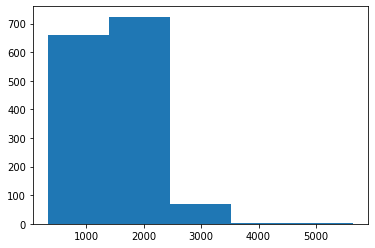

In [ ]:
plt.hist('GrLivArea',data=house_data_train,bins=5  )

SaleCondition by constructing and plotting a pivot table, as we did above for OverallQual.

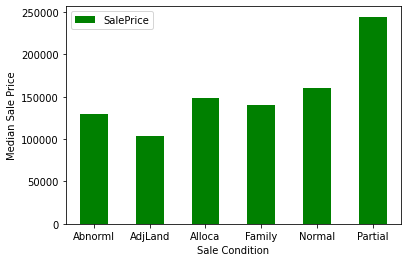

In [ ]:
condition_pivot = house_data_train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='green')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

A distplot is plotted for sqft living to see if the data is skewed or not GrLivArea: Above grade (ground) living area square feet

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


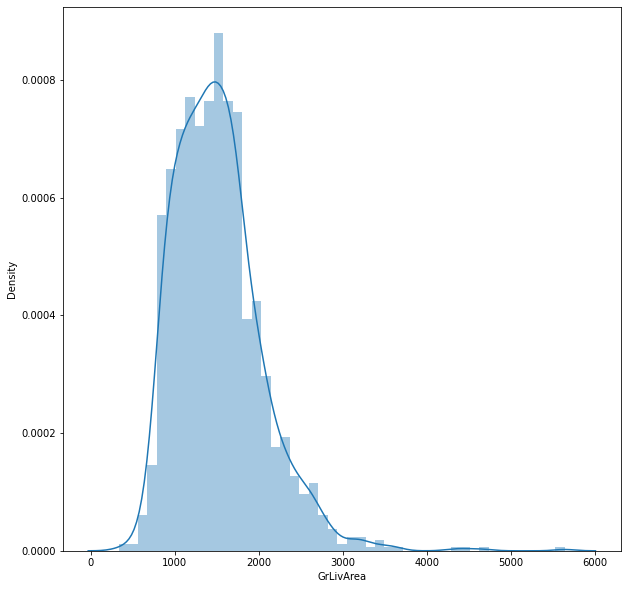

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,10))
sns.distplot(house_data_train['GrLivArea'],hist=True,kde=True,rug=False,label='GrLivArea',norm_hist=True)

Finding the mean, mode and median of sqft living.


In [ ]:
print('Mean',round(house_data_train['GrLivArea'].mean(),2))
print('Median',house_data_train['GrLivArea'].median())
print('Mode',house_data_train['GrLivArea'].mode()[0])

Mean 1515.46
Median 1464.0
Mode 864


Skew : 0.12133506220520406


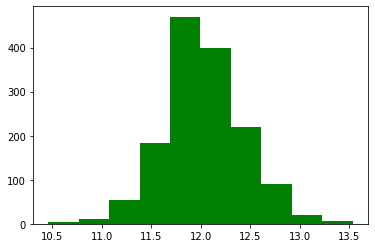

In [ ]:
target = np.log(house_data_train.SalePrice)
print ("Skew :", target.skew())
plt.hist(target, color='green')
plt.show()

Making sure we covered all the relations, we plot a correlation between all the features using a heatmap.

A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors.

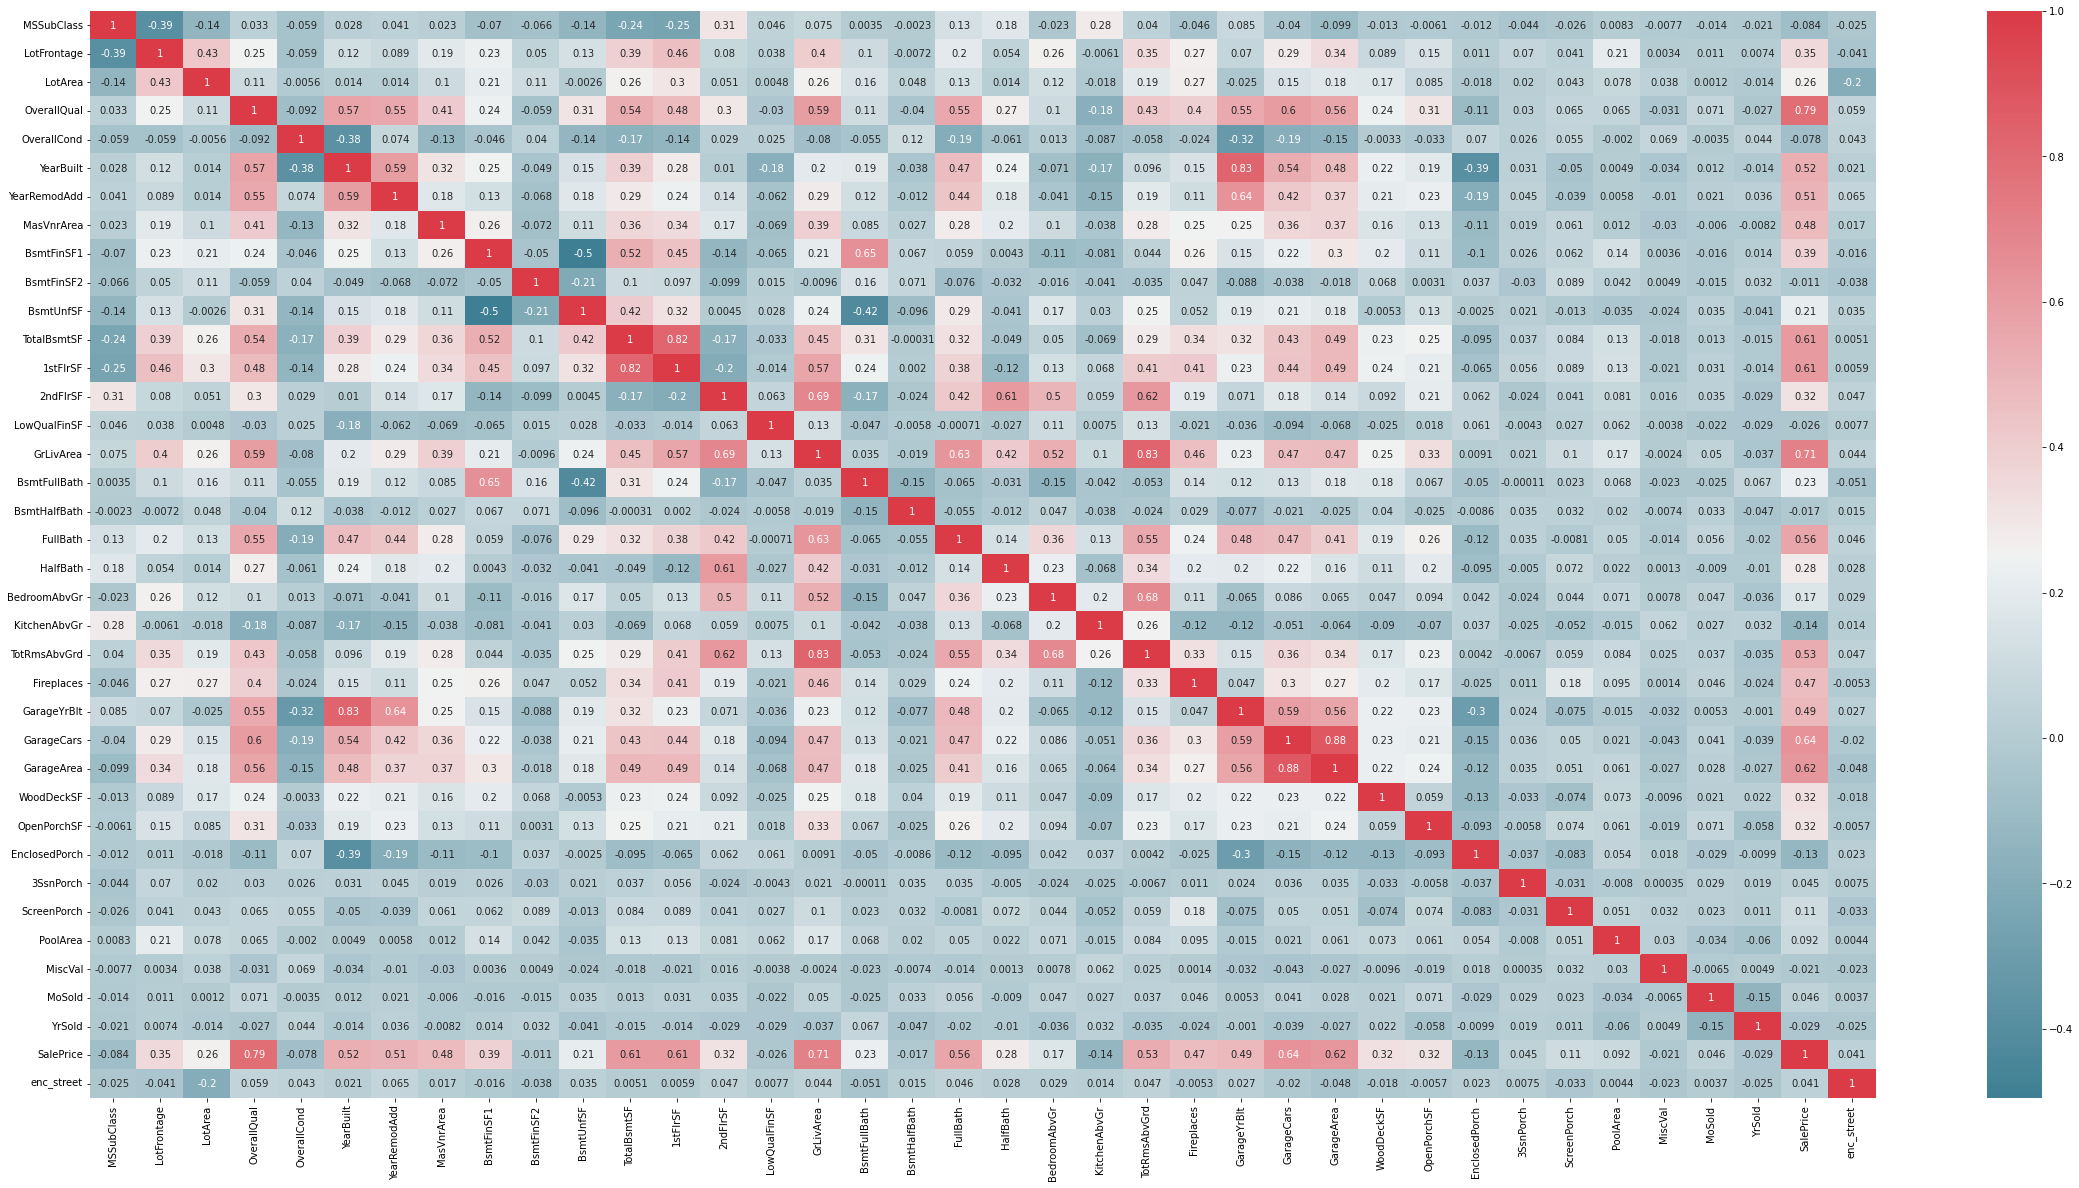

In [ ]:
def plotgraph_correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(40,20))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(house_data_train.corr(),annot=True,cmap=colormap)
    
plotgraph_correlation_heatmap(house_data_train)

# Model Validation

We’ll separate the features and the target variable for modeling. We will assign the features to X and the target variable to y. We use np.log() as explained above to transform the y variable for the model. data.drop([features], axis=1).

We won’t include SalePrice for obvious reasons, and Id is just an index with no relationship to SalePrice.

In [ ]:
data = house_data_train.select_dtypes(include=[np.number]).interpolate().dropna()
sum(data.isnull().sum() != 0)

0

In [ ]:
Y = np.log(house_data_train.SalePrice)
X = data.drop(['SalePrice'], axis=1)

train_test_split() returns four objects:

X_train is the subset of our features used for training.
X_test is the subset which will be our ‘hold-out’ set – what we’ll use to test the model.
y_train is the target variable SalePrice which corresponds to X_train.
y_test is the target variable SalePrice which corresponds to X_test.
The first parameter value X denotes the set of predictor data, and y is the target variable. Next, we set random_state=42. This provides for reproducible results, since sci-kit learn’s train_test_split will randomly partition the data. The test_size parameter tells the function what proportion of the data should be in the test partition. In this example, about 33% of the data is devoted to the hold-out set.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
                          X,Y, random_state=42, test_size=.33)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()

In [ ]:

data_model = lin_model.fit(X_train, Y_train)

Model evaluation
We will evaluate our model using   R2-score.

In [ ]:
print ("R2 is:", data_model.score(X_test, Y_test))

R2 is: 0.8640176881832574


In [ ]:
predictions = data_model.predict(X_test)


 RMSE measures the distance between our predicted values and actual values.

In [ ]:
from sklearn.metrics import mean_squared_error
print ('RMSE value', mean_squared_error(Y_test, predictions))

RMSE value 0.02317565350928139


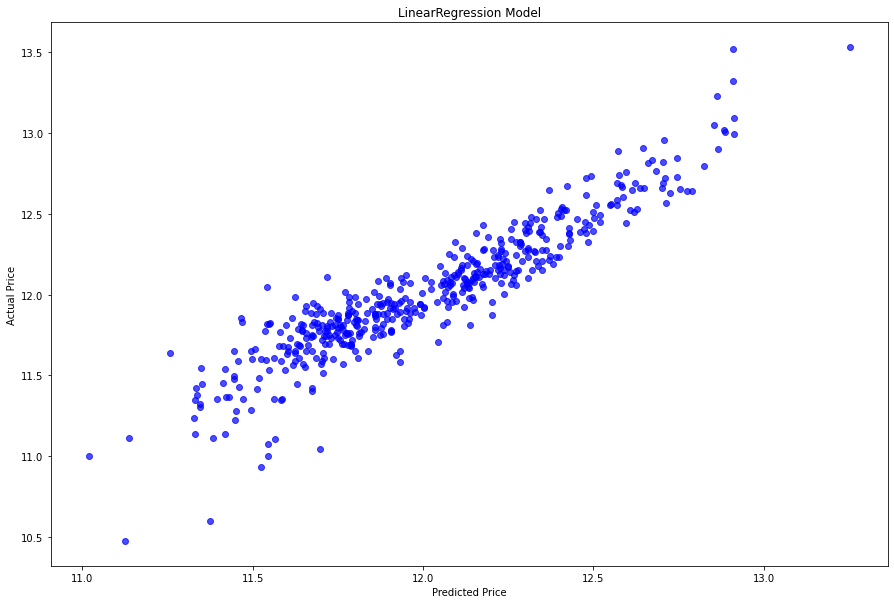

In [ ]:
current_values = Y_test
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(x = predictions, y = current_values,alpha=.7, color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('LinearRegression Model')
plt.show()



#Predict

Numeric Features

In [ ]:
numeric_feat = house_data_train.select_dtypes(include=[np.number])
numeric_feat.dtypes

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
enc_street         uint8
dtype: object

The DataFrame.corr() method displays the correlation (or relationship) between the columns. We’ll examine the correlations between the features and the target. 



In [ ]:
relationship = numeric_feat.corr()
print (relationship['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (relationship['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


The first five features are the most positively correlated with SalePrice, while the next five are the most negatively correlated.

Let’s dig deeper on OverallQual. We can use the .unique() method to get the unique values.

In [ ]:
house_data_train.OverallQual.unique()
# show OverallQual in a pivot_table with SalePrice
quality_graph = house_data_train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
quality_graph

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


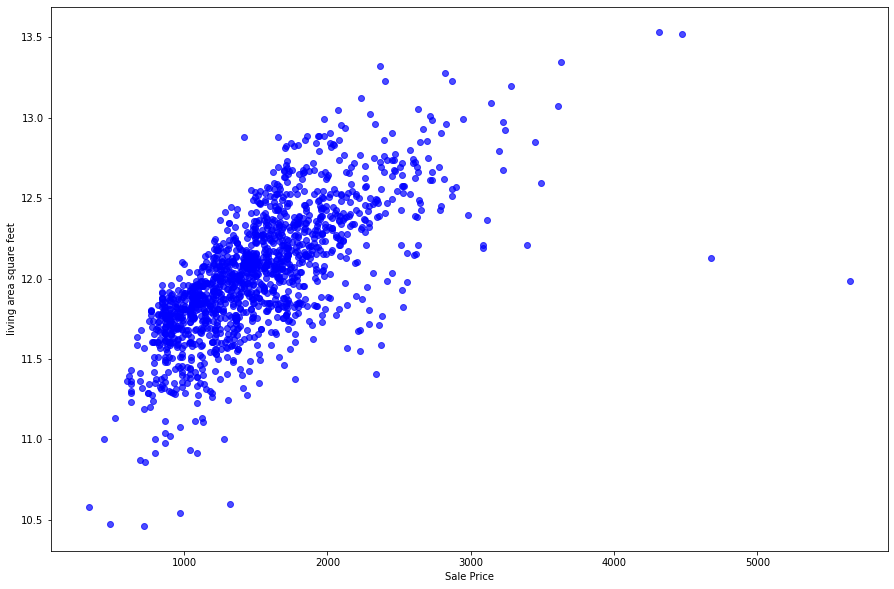

In [ ]:
 
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(x=house_data_train['GrLivArea'], y=target,alpha=.7, color='b')
plt.xlabel('Sale Price')
plt.ylabel('living area square feet') 
plt.show()

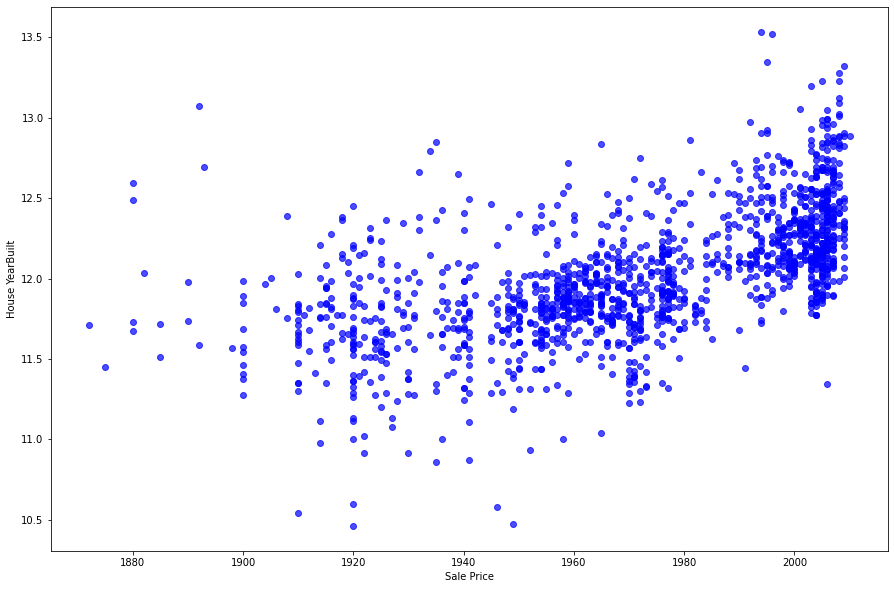

In [ ]:
actual_values = Y_test
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(x=house_data_train['YearBuilt'], y=target,alpha=.7, color='b')
plt.xlabel('Sale Price')
plt.ylabel('House YearBuilt') 
plt.show()



As we can see that there are many homes with 0 for Garage Area, indicating that they don’t have a garage. We’ll transform other features later to reflect this assumption. There are a few outliers as well

In [ ]:
train = house_data_train[house_data_train['GarageArea'] < 1200]

Lets Create a DataFrame and use that to crate new data of test data and save as new data in a new csv file.


In [ ]:
predictionData = pd.DataFrame()
predictionData['Id'] = X_test_house_data_train.Id



Now, we select the features from the test data for use in prediction data

In [ ]:
selectedFeauters = X_test_house_data_train.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()

# settings to display all columns
pd.set_option("display.max_columns", None)
# display the dataframe head and info
# selectedFeauters.head(5)

selectedFeauters.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   LotFrontage    1459 non-null   float64
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1459 non-null   float64
 8   BsmtFinSF1     1459 non-null   float64
 9   BsmtFinSF2     1459 non-null   float64
 10  BsmtUnfSF      1459 non-null   float64
 11  TotalBsmtSF    1459 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1459 non-null   float64
 17  BsmtHalfBath   1459 non-null   float64
 18  FullBath

In [ ]:
predictions = data_model.predict(selectedFeauters)

In [ ]:
final_predictions = np.exp(predictions)

In [ ]:
print ("Original predictions are: \n", predictions[:10], "\n")
print ("Final predictions are: \n", final_predictions[:10])

Original predictions are: 
 [11.69033101 11.70601561 12.03386705 12.18433878 12.11231411 12.08201311
 12.19299578 12.05900957 12.19689007 11.68444104] 

Final predictions are: 
 [119411.52567283 121299.21391606 168361.21640148 195700.12323922
 182100.51704009 176665.44978719 197401.65363943 172647.90540882
 198171.89202737 118710.26313993]


In [ ]:
predictionData['SalePrice'] = final_predictions
predictionData.head() 

,Id,SalePrice
0,1461,119411.525673
1,1462,121299.213916
2,1463,168361.216401
3,1464,195700.123239
4,1465,182100.517040


In [ ]:
predictionData.to_csv('predictions.csv', index=False)
